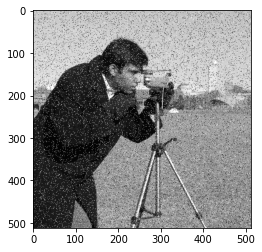

In [38]:
import numpy as np
from skimage import util
from skimage import io
from matplotlib import pyplot as plt
from skimage import data
camera=data.camera()
img=util.random_noise(camera,mode='s&p',amount=0.1)
plt.imshow(img,cmap='gray')

In [39]:
%matplotlib inline
from skimage import filters
from skimage.filters import median
from scipy import ndimage

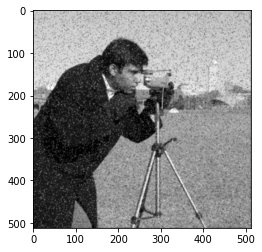

In [40]:
f1=np.ones((3,3),dtype=np.int8)
f1=f1*(1/9)
camerafiltreMoy=ndimage.convolve(img, f1,mode='constant')
plt.imshow(camerafiltreMoy,cmap='gray')

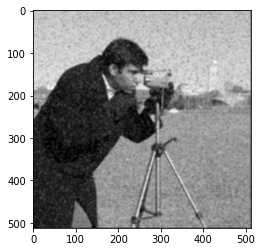

In [41]:
f1=np.ones((5,5),dtype=np.int8)
f1=f1*(1/25)
camerafiltreMoy=ndimage.convolve(img, f1,mode='constant')
plt.imshow(camerafiltreMoy,cmap='gray')

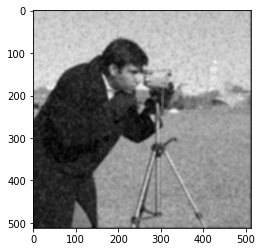

In [42]:
f1=np.ones((7,7),dtype=np.int8)
f1=f1*(1/49)
camerafiltreMoy=ndimage.convolve(img, f1,mode='constant')
plt.imshow(camerafiltreMoy,cmap='gray')

Le filtre 3,3 est le meilleur

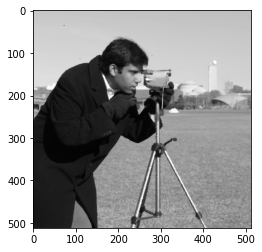

In [43]:
camerafiltreMedian=ndimage.median_filter(img,size=(3,3))
plt.imshow(camerafiltreMedian,cmap='gray')

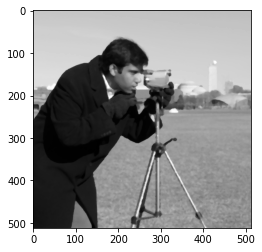

In [44]:
camerafiltreMedian=ndimage.median_filter(img,size=(5,5))
plt.imshow(camerafiltreMedian,cmap='gray')

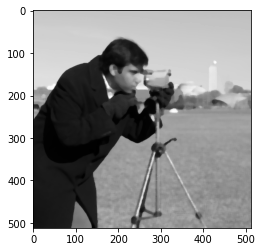

In [45]:
camerafiltreMedian=ndimage.median_filter(img,size=(7,7))
plt.imshow(camerafiltreMedian,cmap='gray')

Le filtre median calcul l'intensité  des images suivant les pixels entouré de lui 
donc lorsque on a augmenté le size la fonction va calculer le médian de plus de pixels
le filtre median est plus efficace dans notre cas car il nous donne une resultat plus lisse 
et il enleve presque completement le bruit de l'image

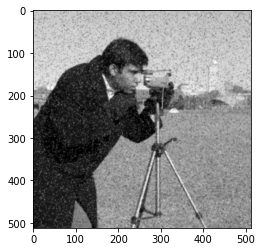

In [46]:
camerafiltreGaussian=ndimage.gaussian_filter(img,sigma=1)
plt.imshow(camerafiltreGaussian,cmap='gray')

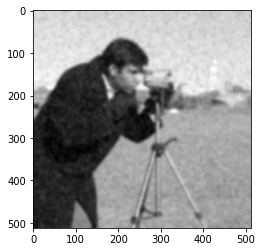

In [47]:
camerafiltreGaussian=ndimage.gaussian_filter(img,sigma=3)
plt.imshow(camerafiltreGaussian,cmap='gray')

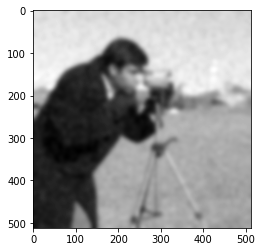

In [48]:
camerafiltreGaussian=ndimage.gaussian_filter(img,sigma=5)
plt.imshow(camerafiltreGaussian,cmap='gray')

Lorsque on augmente sigma l'image serait flou

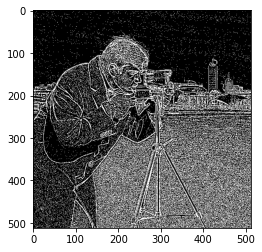

In [63]:
camera=data.camera()
f2=np.ones((3,3),dtype=np.int8)
f2[1][1]=-8
f2=f2*(-1/9)
IPH=ndimage.convolve(camera, f2)
plt.imshow(IPH,cmap='gray')

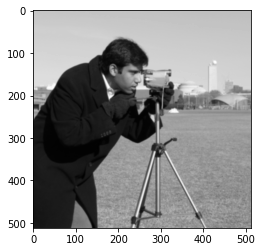

In [73]:
f=np.ones((3,3),dtype=np.int8)
f=f/9
IPB=ndimage.convolve(camera, f)
plt.imshow(IPB,cmap='gray')

IPH et simplement le contour de l'image IPB

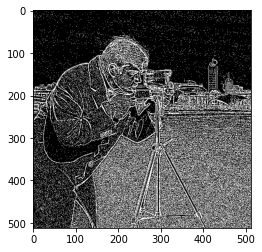

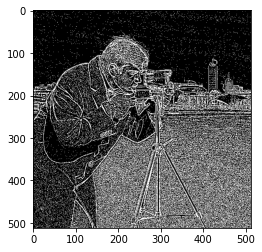

In [74]:
IP=camera-IPB
plt.imshow(IP,cmap='gray')
plt.show()
plt.imshow(IPH,cmap='gray')

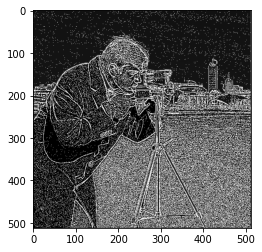

In [52]:
IHB=(1.1-1)*camera+IPH
plt.imshow(IHB,cmap='gray')

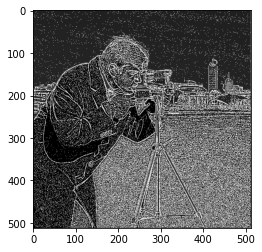

In [53]:
IHB=(1.2-1)*camera+IPH
plt.imshow(IHB,cmap='gray')

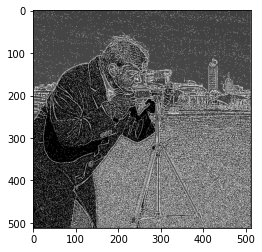

In [54]:
IHB=(1.5-1)*camera+IPH
plt.imshow(IHB,cmap='gray')

on augmentant A les on remarque qu'on a de bruit avec le contour meme si ona un filtre passe haut

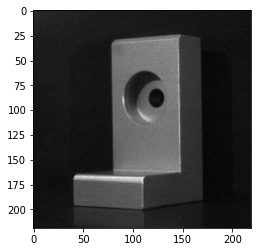

In [76]:
image=plt.imread("L.png")
plt.imshow(image,cmap='gray')


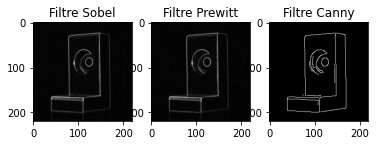

In [77]:
plt.subplot(1, 3,1)
Filtresobel=filters.sobel(image)
plt.imshow(Filtresobel,cmap='gray')
plt.title("Filtre Sobel")

plt.subplot(1, 3, 2)
Filtreprewitt=filters.prewitt(image)
plt.imshow(Filtreprewitt,cmap='gray')
plt.title("Filtre Prewitt")
from skimage.feature import canny

plt.subplot(1, 3, 3)
Filtrecanny=canny(image)
plt.imshow(Filtrecanny,cmap='gray')
plt.title("Filtre Canny")
plt.show()

In [93]:
def a(img,seuil):
    Z=img>(seuil*img.max())
    
    return Z



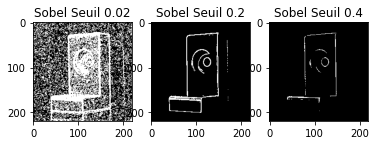

In [95]:
plt.subplot(1, 3,1)
Z1=a(Filtresobel,0.02)
plt.imshow(Z1,cmap='gray')
plt.title("Sobel Seuil 0.02")

plt.subplot(1, 3,2)
Z2=a(Filtresobel,0.2)
plt.imshow(Z2,cmap='gray')
plt.title("Sobel Seuil 0.2")

plt.subplot(1, 3,3)
Z3=a(Filtresobel,0.4)
plt.imshow(Z3,cmap='gray')
plt.title("Sobel Seuil 0.4")
plt.show()


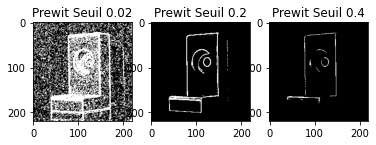

In [99]:
plt.subplot(1, 3,1)
Z1=a(Filtreprewitt,0.02)
plt.imshow(Z1,cmap='gray')
plt.title("Prewit Seuil 0.02")

plt.subplot(1, 3,2)
Z2=a(Filtreprewitt,0.2)
plt.imshow(Z2,cmap='gray')
plt.title("Prewit Seuil 0.2")

plt.subplot(1, 3,3)
Z3=a(Filtreprewitt,0.4)
plt.imshow(Z3,cmap='gray')
plt.title("Prewit Seuil 0.4")
plt.show()

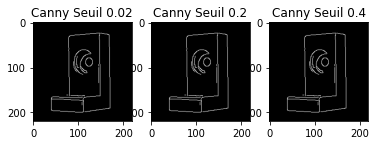

In [98]:
plt.subplot(1, 3,1)
Z1=a(Filtrecanny,0.02)
plt.imshow(Z1,cmap='gray')
plt.title("Canny Seuil 0.02")

plt.subplot(1, 3,2)
Z2=a(Filtrecanny,0.2)
plt.imshow(Z2,cmap='gray')
plt.title("Canny Seuil 0.2")

plt.subplot(1, 3,3)
Z3=a(Filtrecanny,0.4)
plt.imshow(Z3,cmap='gray')
plt.title("Canny Seuil 0.4")
plt.show()

0.2 est la meilleur seuil

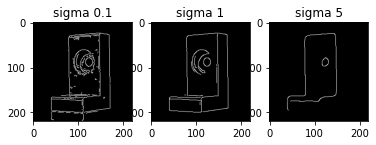

In [103]:
from skimage import feature

plt.subplot(1, 3,1)
cannyf = feature.canny(image, sigma=0.1)
plt.imshow(cannyf,cmap='gray')
plt.title("sigma 0.1")

plt.subplot(1, 3,2)
cannyf = feature.canny(image, sigma=1)
plt.imshow(cannyf,cmap='gray')
plt.title("sigma 1")

plt.subplot(1, 3,3)
cannyf = feature.canny(image, sigma=5)
plt.imshow(cannyf,cmap='gray')
plt.title("sigma 5")
plt.show()

on augmantant sigma il y'a des parties de la contour qui disparaitra